First of all we import the libraries we need

In [1]:
from pyuul import utils,VolumeMaker
import os,urllib,torch
import numpy as np

#the following line is required only if you use a python notebook
%matplotlib notebook 

import matplotlib
import matplotlib.pyplot as plt

We fetch the protein structure (pdbID 1wou) and we parse the PDB using the pyuul utils module

In [2]:
os.makedirs('exampleStructures',exist_ok=True)
urllib.request.urlretrieve('http://files.rcsb.org/download/1WOU.pdb', 'exampleStructures/1wou.pdb')
coords, atname = utils.parsePDB('exampleStructures/1wou.pdb')

we also can chose which device to use: GPU ("cuda") or CPU ("cpu"). Since not everybody has a cuda compatible GPU, let's use CPU for this time. However, GPU calculation is gonna be way faster

In [3]:
device = "cpu"

We defined which atoms belong to a secondary sturucture using DSSP. In this tutorial, for simplicity, we precalculated it. We therefore have an array with ones in position that correspond to atoms belonging to alpha helixes and zeros everywhere else

In [4]:
alpha_helices = [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]

for every atom in the coordinates there is a label in alpha_helices

In [5]:
print("number of labels:",len(alpha_helices[0]),"number of atoms:",len(coords[0]))

number of labels: 947 number of atoms: 947


Let's now define our convolutional 3D model. We will use a very simple model with only 3 layers, followed by a 3 layers feed forward neural netwrk. As usual, the network is a child of the torch.nn.Module class

In [6]:
class Conv3dModel(torch.nn.Module):

    def __init__(self, chIn, name="conv3dModel",dev="cpu"):
        super(Conv3dModel, self).__init__()
        self.name = name

        chout=100
        self.conv = torch.nn.Sequential(torch.nn.Conv3d(chIn, 10, 7, 1, 3), torch.nn.Dropout(0.1), torch.nn.InstanceNorm3d(10),
                                    torch.nn.LeakyReLU(), torch.nn.Conv3d(10, 10, 7, 1, 3), torch.nn.InstanceNorm3d(10),
                                    torch.nn.LeakyReLU(), torch.nn.Conv3d(10, 10, 7, 1, 3), torch.nn.InstanceNorm3d(10),
                                    torch.nn.LeakyReLU(), torch.nn.Conv3d(10, chout, 1, 1, 0)).to(dev)
       
        self.final = torch.nn.Sequential(torch.nn.Linear(chout,chout),torch.nn.LeakyReLU(),
                                     torch.nn.Linear(chout, chout), torch.nn.LeakyReLU(),
                                     torch.nn.Linear(chout, 1), torch.nn.Sigmoid()
                                     ).to(dev)

    def forward(self, x):

        o = self.conv(x)
        o = o.permute(0,2,3,4,1)
        o= self.final(o)
        return o.squeeze()

We now can create our neural network object, using the Conv3dModel class we just created

In [7]:
model = Conv3dModel(chIn=17, dev=device)

we also need some other standard neural network tools: an optimizer and a loss function. As optimizer we use Adam algorithm. It is quite standard but feel free to try any other pytorch optimizer. As loss function, we are gonna use binary crossentropy, since we are going to perform a binary classification

In [8]:
optimizer = torch.optim.Adam(model.parameters())
lossFunction = torch.nn.BCELoss()

Now we can calculate atom radius and channels of the protein using the utils of PyUUL

In [9]:
atom_channel = utils.atomlistToChannels(atname).to(device)
radius = utils.atomlistToRadius(atname).to(device)

We can now use the main volumeMaker object to build both the volumetric representation and the labels, since the labels will have the same shape of the volume, but with a single channel (a value that is 1 if the voxel contains at least an atom belonging to an alpha helix, 0 otherwise).

In [10]:
volmaker = VolumeMaker.Voxels(device=device)
voxellizedVolume = volmaker(coords, radius, atom_channel,resolution=0.5).to_dense()
label = volmaker(coords, radius, torch.zeros(coords.shape[:-1],device=device),resolution=0.5).to_dense()

print(label.shape,voxellizedVolume.shape)


torch.Size([1, 1, 76, 85, 93]) torch.Size([1, 17, 76, 85, 93])


Lets now have a look at the two volumes we just generated. In order to visualize the volume, let's sum over the channels dimension. 

<IPython.core.display.Javascript object>


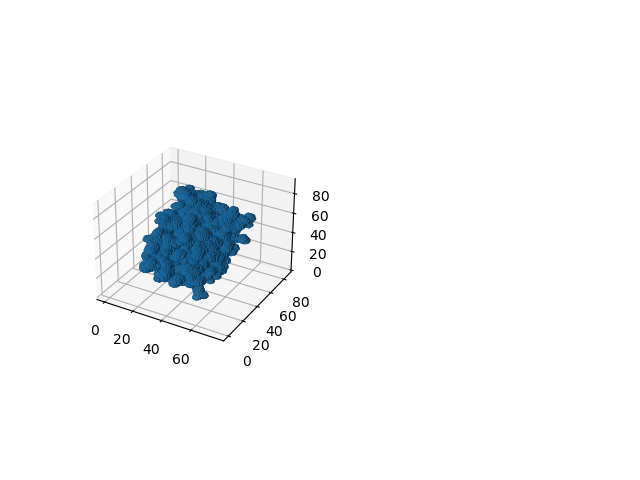

In [11]:
ax = plt.figure().add_subplot(1, 2, 1,projection='3d')
voxels = voxellizedVolume.sum(1) > 0.5
ax.voxels(voxels[0])
plt.show()



Now we have the main optimization loop. We iterate the training for 10 epochs and we optimize the network's weights. This is a resources intensive step!

In [12]:
epochs = 50
for e in range(epochs):

    yp = model(voxellizedVolume)
    loss = lossFunction(yp, label[0,0, :, :, :])
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    if e%5==0:
        print("epoch",e, "loss ", float(loss.data.cpu()))
    

epoch 0 loss  0.6730874180793762
epoch 5 loss  0.6012370586395264
epoch 10 loss  0.5203109383583069
epoch 15 loss  0.40665802359580994
epoch 20 loss  0.27443912625312805
epoch 25 loss  0.1583249866962433
epoch 30 loss  0.08933841437101364
epoch 35 loss  0.06173434108495712
epoch 40 loss  0.05150996148586273
epoch 45 loss  0.04766447842121124


Our model now has been trained!